In [1]:
library('readr')
library('SPEI')
library('xts')


Loading required package: lmomco
Loading required package: parallel
Loading required package: ggplot2
# Package SPEI (1.7) loaded [try SPEINews()].
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



## Read in altered precip data

In [2]:
fname <- 'spei_input_files/plotrep_monthly_25_50_5_header.csv'
#header <- read.csv(fname, skip=3, nrows=1)
df_alt <- read.csv(fname)
#df[df==-9999] <- NA
#colnames(df) <- colnames(header)

df_alt$actual.month <- df_alt$water.month-3
df_alt$actual.year <- df_alt$water.year
m_idx <- df_alt$actual.month < 1

df_alt$actual.month[m_idx] <- df_alt$actual.month[m_idx]+12
df_alt$actual.year[m_idx] <- df_alt$actual.year[m_idx]-1
df_alt$Date <- as.Date(as.yearmon(paste(df_alt$actual.year, df_alt$actual.month, sep='-'),
                       '%Y-%m'), frac=1)
head(df_alt)
tail(df_alt)

site,water.year,water.month,serial,days,ambient,reduced,incvar_a,incvar_b,redmean_a,⋯,redmean_a_4,redmean_a_5,redmean_b_1,redmean_b_2,redmean_b_3,redmean_b_4,redmean_b_5,actual.month,actual.year,Date
40,2003,1,37545,31,1.7,1.275,0.85,2.55,0.425,⋯,0.425,2.125,0.425,2.125,0.425,2.125,0.425,10,2002,2002-10-31
40,2003,2,37576,30,15.9,11.925,7.95,23.85,3.975,⋯,3.975,19.875,3.975,19.875,3.975,19.875,3.975,11,2002,2002-11-30
40,2003,3,37606,31,13.6,10.200,6.80,20.40,3.400,⋯,3.400,17.000,3.400,17.000,3.400,17.000,3.400,12,2002,2002-12-31
40,2003,4,37637,31,0.0,0.000,0.00,0.00,0.000,⋯,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,2003,2003-01-31
40,2003,5,37667,28,11.5,8.625,5.75,17.25,2.875,⋯,2.875,14.375,2.875,14.375,2.875,14.375,2.875,2,2003,2003-02-28
40,2003,6,37696,31,14.3,10.725,7.15,21.45,3.575,⋯,3.575,17.875,3.575,17.875,3.575,17.875,3.575,3,2003,2003-03-31


,site,water.year,water.month,serial,days,ambient,reduced,incvar_a,incvar_b,redmean_a,⋯,redmean_a_4,redmean_a_5,redmean_b_1,redmean_b_2,redmean_b_3,redmean_b_4,redmean_b_5,actual.month,actual.year,Date
775,50,2015,7,42110,30,15.6,11.700,7.80,23.40,3.900,⋯,3.900,19.500,3.900,3.900,19.500,19.500,3.900,4,2015,2015-04-30
776,50,2015,8,42140,31,27.9,20.925,13.95,41.85,6.975,⋯,6.975,34.875,6.975,6.975,34.875,34.875,6.975,5,2015,2015-05-31
777,50,2015,9,42171,30,28.2,21.150,14.10,42.30,7.050,⋯,7.050,35.250,7.050,7.050,35.250,35.250,7.050,6,2015,2015-06-30
778,50,2015,10,42201,31,32.4,24.300,16.20,48.60,8.100,⋯,8.100,40.500,8.100,8.100,40.500,40.500,8.100,7,2015,2015-07-31
779,50,2015,11,42232,31,37.4,28.050,18.70,56.10,9.350,⋯,9.350,46.750,9.350,9.350,46.750,46.750,9.350,8,2015,2015-08-31
780,50,2015,12,42263,30,13.0,9.750,6.50,19.50,3.250,⋯,3.250,16.250,3.250,3.250,16.250,16.250,3.250,9,2015,2015-09-30


## Read in met data

In [3]:
fname <- 'spei_input_files/Met_all_gapfill.csv'
#header <- read.csv(fname, skip=3, nrows=1)
df <- read.csv(fname, header=TRUE)
#df[df==-9999] <- NA
#colnames(df) <- colnames(header)
head(df)

X,Date,Month,Day,Year,Sta,Avg_Temp,Max_Temp,Min_Temp,Avg_RH,⋯,Avg_Resultant_WindSP,Avg_Wind_Dir,Solar_Rad,Avg_Soil_Temp,Max_Soil_Temp,Min_Soil_Temp,Jul_Day,Max_Tempfill,Min_Tempfill,Avg_Tempfill
1,1/1/1992,1,1,1992,1,0.8,6.2,-4.6,72.4,⋯,1.8,6.3,12.6,3.5,6.1,1.8,1Jan92,6.2,-4.6,0.8
2,1/2/1992,1,2,1992,1,-0.2,5.8,-6.2,68.8,⋯,2.6,348.9,13.0,2.7,5.1,1.4,2Jan92,5.8,-6.2,-0.2
3,1/3/1992,1,3,1992,1,-3.6,0.0,-7.1,80.9,⋯,1.0,9.7,3.0,1.3,2.0,1.2,3Jan92,0.0,-7.1,-3.6
4,1/4/1992,1,4,1992,1,4.0,9.6,-1.7,70.3,⋯,1.0,221.9,8.8,3.2,6.4,1.3,4Jan92,9.6,-1.7,4.0
5,1/5/1992,1,5,1992,1,2.8,10.1,-4.5,80.9,⋯,0.5,355.3,10.4,3.9,6.6,1.7,5Jan92,10.1,-4.5,2.8
6,1/6/1992,1,6,1992,1,5.7,11.3,0.0,90.1,⋯,1.0,217.8,5.9,5.0,7.1,4.0,6Jan92,11.3,0.0,5.7


In [4]:
# Integration period for SPEI (in months)
int_months <- 6
# First part of outfile
outfile <- paste("SPEI_tho_altprecip_", as.character(int_months), "mo_Sev", sep='')
# List stations and latitudes
station <- c(40, 42, 48, 49, 50)
lat <- c(34.3592, 34.368, 34.4146, 34.3331, 34.3348)
# Shift for wateryear
#diff <- as.Date("2007-01-01") - as.Date("2006-10-01")


for (i in 1:5){
    # Subset to station
    df_subs <- df[df$Sta==station[i],]

    # old pet df_subs$PET <- thornthwaite(df_subs$Avg_Temp, lat[i], na.rm=T)
    df_subs$Jul_Day <- 0 # string, get rid of it
    # Create a date column
    df_subs$Date <- as.Date(df_subs$Date, "%m/%d/%Y" )
    # Subset again
    df_subs <- subset(df_subs, subset=(df_subs$Date > as.Date("2002-09-30")))
    df_subs <- df_subs[,c('Date', 'Avg_Temp', 'Precip')]
    # Create xts timeseries and downsample to monthly data
    df_subs <- xts(df_subs[,2:ncol(df_subs)], df_subs$Date)
    df_subs_m <- apply.monthly(df_subs$Avg_Temp, FUN=mean)
    df_subs_m$Precip_ambient <- apply.monthly(df_subs$Precip, FUN=sum)
    # Calculate PET with thornthwaite
    PET <- thornthwaite(df_subs_m$Avg_Temp, lat[i], na.rm=T)
    df_subs_m$PET <- xts(as.vector(PET),  order.by=index(df_subs_m$Avg_Temp))
    
    # Add in station ID
    df_subs_m$Sta <- station[i]

    # Add in columns from altered precip regimes
    alt_subs <- df_alt[df_alt$site==station[i],]
    alt_subs <- xts(alt_subs[,2:41], alt_subs$Date)
    df_subs_m <- cbind(df_subs_m, alt_subs[,1:2])
    df_subs_m <- cbind(df_subs_m, alt_subs[,5:6])
    df_subs_m <- cbind(df_subs_m, alt_subs[,21:40])
    print(head(df_subs_m))
    for (j in 7:ncol(df_subs_m)){
        # Calculate climatic water differential then SPEI
        cwdiff <- df_subs_m[,j] - df_subs_m$PET
        # Get start and end month for the timeseries object
        startmon <- as.numeric(index(df_subs_m[1]))
        startyr <- floor(startmon)
        startmon <- ceiling((startmon-startyr)*12) + 1
        # Calculate SPEI
        spei_i <- spei(ts(cwdiff, frequency=12, start=c(startyr, startmon)),
                       int_months, na.rm=TRUE)
        # Make this an xts object that can be bound to df_subs_m
        spei_cname <- paste(colnames(df_subs_m[,j]), 'SPEI', sep='_')
        spei_i <- xts(as.vector(spei_i$fitted), index(cwdiff))
        names(spei_i) <- spei_cname

        df_subs_m <- cbind(df_subs_m, spei_i)
    }
    
    # There may be both infinite and NA values in the output
    # Convert -Inf to NA
    print(sum(is.na(df_subs_m)))
    df_subs_m[!is.finite(df_subs_m)] <- NA
    print(sum(is.na(df_subs_m)))
    
    # Interpolate over NA values
    df_subs_m_interp <- na.approx(df_subs_m)
    
    # Somehow a funky entry at 2009-2-12 is created, remove
    # This only happens for station 50
    nrow(df_subs_m)
    df_subs_m <- df_subs_m[c('::2009-01-31', '2009-02-28::')]
    nrow(df_subs_m)
    
    if (i==1){
        m_out <- data.frame(date=index(df_subs_m),coredata(df_subs_m))
        m_out_interp <- data.frame(date=index(df_subs_m_interp),coredata(df_subs_m_interp))
    } else {
        m_out <- rbind(m_out, data.frame(date=index(df_subs_m),coredata(df_subs_m)))
        m_out_interp <- rbind(m_out_interp, data.frame(date=index(df_subs_m_interp),coredata(df_subs_m_interp)))
    }
}


# Somehow a funky entry at 2009-2-12 is created, remove
nrow(m_out)
nrow(m_out_interp)


#write.zoo(m_out, file = paste(outfile, '.csv', sep=''),
#          index.name = "Date", sep=',', row.names = FALSE, col.names=TRUE)
write.csv(m_out, file = paste('./SPEI_out/', outfile, '.csv', sep=''), row.names = FALSE)

#write.zoo(m_out, file = paste(outfile, '_NAinterp.csv', sep=''),
#          index.name = "Date", sep=',', row.names = FALSE, col.names=TRUE)
write.csv(m_out_interp, file = paste('./SPEI_out/', outfile, '_NAinterp.csv', sep=''), row.names = FALSE)
head(m_out)
tail(m_out)



            Avg_Temp Precip_ambient       PET Sta water.year water.month
2002-10-31 12.919355            1.7 39.812300  40       2003           1
2002-11-30  6.276667           15.9 13.059183  40       2003           2
2002-12-31  1.280645           13.6  1.464719  40       2003           3
2003-01-31  4.645161            0.0 10.663440  40       2003           4
2003-02-28  4.914286           11.5 12.809301  40       2003           5
2003-03-31  8.425806           14.3 28.628004  40       2003           6
           ambient reduced incvar_a_1 incvar_a_2 incvar_a_3 incvar_a_4
2002-10-31     1.7   1.275       0.85       2.55       0.85       0.85
2002-11-30    15.9  11.925       7.95      23.85       7.95       7.95
2002-12-31    13.6  10.200       6.80      20.40       6.80       6.80
2003-01-31     0.0   0.000       0.00       0.00       0.00       0.00
2003-02-28    11.5   8.625       5.75      17.25       5.75       5.75
2003-03-31    14.3  10.725       7.15      21.45       7.15    

[1] 780

[1] 781

date,Avg_Temp,Precip_ambient,PET,Sta,water.year,water.month,ambient,reduced,incvar_a_1,⋯,redmean_a_1_SPEI,redmean_a_2_SPEI,redmean_a_3_SPEI,redmean_a_4_SPEI,redmean_a_5_SPEI,redmean_b_1_SPEI,redmean_b_2_SPEI,redmean_b_3_SPEI,redmean_b_4_SPEI,redmean_b_5_SPEI
2002-10-31,12.919355,1.7,39.812300,40,2003,1,1.7,1.275,0.85,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2002-11-30,6.276667,15.9,13.059183,40,2003,2,15.9,11.925,7.95,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2002-12-31,1.280645,13.6,1.464719,40,2003,3,13.6,10.200,6.80,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2003-01-31,4.645161,0.0,10.663440,40,2003,4,0.0,0.000,0.00,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2003-02-28,4.914286,11.5,12.809301,40,2003,5,11.5,8.625,5.75,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2003-03-31,8.425806,14.3,28.628004,40,2003,6,14.3,10.725,7.15,⋯,0.4502657,-0.607396,0.4739065,-0.850714,0.7960237,-0.4231818,0.8939025,-0.1581047,0.3964247,-0.4760121


,date,Avg_Temp,Precip_ambient,PET,Sta,water.year,water.month,ambient,reduced,incvar_a_1,⋯,redmean_a_1_SPEI,redmean_a_2_SPEI,redmean_a_3_SPEI,redmean_a_4_SPEI,redmean_a_5_SPEI,redmean_b_1_SPEI,redmean_b_2_SPEI,redmean_b_3_SPEI,redmean_b_4_SPEI,redmean_b_5_SPEI
775,2015-04-30,14.37333,15.6,60.42055,50,2015,7,15.6,11.700,7.80,⋯,0.9036105,0.9711210,-0.23775419,0.05927801,1.0840875,-0.09542547,-0.0609172,0.9916991,1.1530561,-0.1633438
776,2015-05-31,17.32581,27.9,77.44409,50,2015,8,27.9,20.925,13.95,⋯,1.2995160,1.4192674,0.25490395,0.36628391,1.4293733,0.18513979,0.2619406,1.1081845,1.3712915,0.2689241
777,2015-06-30,25.86000,28.2,131.77889,50,2015,9,28.2,21.150,14.10,⋯,1.5500124,1.4606850,0.34985656,0.42505042,1.3197312,0.21548066,0.3502950,1.2212370,1.3763528,0.3424341
778,2015-07-31,25.36129,32.4,120.12396,50,2015,10,32.4,24.300,16.20,⋯,1.1076660,1.0845876,-0.02014783,0.11800312,1.0975104,-0.02156691,0.1793237,0.8244634,1.0077985,-0.1091939
779,2015-08-31,26.48387,37.4,114.91625,50,2015,11,37.4,28.050,18.70,⋯,1.1162833,1.1514731,-0.22352514,-0.09250500,1.1981909,-0.13625453,-0.1330986,0.8903056,0.8648700,-0.4103504
780,2015-09-30,23.76333,13.0,95.78959,50,2015,12,13.0,9.750,6.50,⋯,0.5777011,0.6596678,-0.86349632,-0.86253129,0.6587602,-0.79032816,-0.8704261,0.4959536,0.3499819,-1.0851702


## Former (wrong) alltrt SPEI

The next two cells generate spei for each

"SPEI_tho_altprecip_6mo_Sev.csv" was melted to put PET and precip data from all sites(5)/treatments(many - see above) in their own column so that SPEI could be calculated in a relative sense. This is where the 'SPEI_melt.csv' file came from. This file, however, was wrong because of the daily PET calculation problem.

In [49]:
# Now read in treatment comparison file
fname <- 'spei_input_files/SPEI_melt.csv'
#header <- read.csv(fname, skip=3, nrows=1)
df_melt <- read.csv(fname, header=TRUE)
df_melt$Date <- as.Date(paste(df_melt$year, df_melt$month, df_melt$day, sep='-'), "%Y-%m-%d" )
df_melt <- df_melt[with(df_melt, order(Sta, treatment, Date)), ]
#df[df==-9999] <- NA
#colnames(df) <- colnames(header)

tail(df_melt)

,X,month,day,year,PET,Precip_ambient,Sta,water.year,water.month,treatment,value,Date
1042,1042,4,30,2015,54.99280,15.6,50,2015,7,reduced,11.700,2015-04-30
1107,1107,5,31,2015,74.11162,27.9,50,2015,8,reduced,20.925,2015-05-31
1172,1172,6,30,2015,131.89745,28.2,50,2015,9,reduced,21.150,2015-06-30
1237,1237,7,31,2015,129.70141,32.4,50,2015,10,reduced,24.300,2015-07-31
1302,1302,8,31,2015,138.52581,37.4,50,2015,11,reduced,28.050,2015-08-31
1367,1367,9,30,2015,114.52168,13.0,50,2015,12,reduced,9.750,2015-09-30


In [50]:
# Calculate climatic water differential then SPEI
cwdiff2 <- df_melt$value - df_melt$PET
# Get start and end month for the timeseries object
#startmon <- as.numeric(index(df_subs_m[1]))
#startyr <- floor(startmon)
#startmon <- ceiling((startmon-startyr)*12) + 1
# Calculate SPEI
spei2_i <- spei(ts(cwdiff2, frequency=12, start=c(1900, 1)),
                       int_months, na.rm=TRUE)
#plot(spei2_i)
#df_melt$treatment
# Make this an xts object that can be bound to df_subs_m
#spei2_cname <- 'SPEI_multitreatment'
df_melt$spei_multitrt <- as.vector(spei2_i$fitted)
#names(spei2_i) <- spei2_cname


tail(df_melt)

write.csv(df_melt, file = paste('./SPEI_out/', 'SPEI_melt_alltrtSPEI', '.csv', sep=''), row.names = FALSE)

,X,month,day,year,PET,Precip_ambient,Sta,water.year,water.month,treatment,value,Date,spei_multitrt
1042,1042,4,30,2015,54.99280,15.6,50,2015,7,reduced,11.700,2015-04-30,0.1651465
1107,1107,5,31,2015,74.11162,27.9,50,2015,8,reduced,20.925,2015-05-31,-0.4808157
1172,1172,6,30,2015,131.89745,28.2,50,2015,9,reduced,21.150,2015-06-30,-1.2176538
1237,1237,7,31,2015,129.70141,32.4,50,2015,10,reduced,24.300,2015-07-31,-1.6957110
1302,1302,8,31,2015,138.52581,37.4,50,2015,11,reduced,28.050,2015-08-31,-2.0840154
1367,1367,9,30,2015,114.52168,13.0,50,2015,12,reduced,9.750,2015-09-30,-2.2492447


# Fix and redo multi-site SPEI

Basing this off the m_out dataframe

In [5]:
df_multista <- m_out[,1:7]

head(df_multista)
tail(df_multista)

date,Avg_Temp,Precip_ambient,PET,Sta,water.year,water.month
2002-10-31,12.919355,1.7,39.812300,40,2003,1
2002-11-30,6.276667,15.9,13.059183,40,2003,2
2002-12-31,1.280645,13.6,1.464719,40,2003,3
2003-01-31,4.645161,0.0,10.663440,40,2003,4
2003-02-28,4.914286,11.5,12.809301,40,2003,5
2003-03-31,8.425806,14.3,28.628004,40,2003,6


,date,Avg_Temp,Precip_ambient,PET,Sta,water.year,water.month
775,2015-04-30,14.37333,15.6,60.42055,50,2015,7
776,2015-05-31,17.32581,27.9,77.44409,50,2015,8
777,2015-06-30,25.86000,28.2,131.77889,50,2015,9
778,2015-07-31,25.36129,32.4,120.12396,50,2015,10
779,2015-08-31,26.48387,37.4,114.91625,50,2015,11
780,2015-09-30,23.76333,13.0,95.78959,50,2015,12


,date,Avg_Temp,Precip_ambient,PET,Sta,water.year,water.month,spei_multistation
775,2015-04-30,14.37333,15.6,60.42055,50,2015,7,-0.65415208
776,2015-05-31,17.32581,27.9,77.44409,50,2015,8,-0.31819867
777,2015-06-30,25.86000,28.2,131.77889,50,2015,9,-0.01298491
778,2015-07-31,25.36129,32.4,120.12396,50,2015,10,-0.21301468
779,2015-08-31,26.48387,37.4,114.91625,50,2015,11,-0.44963225
780,2015-09-30,23.76333,13.0,95.78959,50,2015,12,-0.98316814


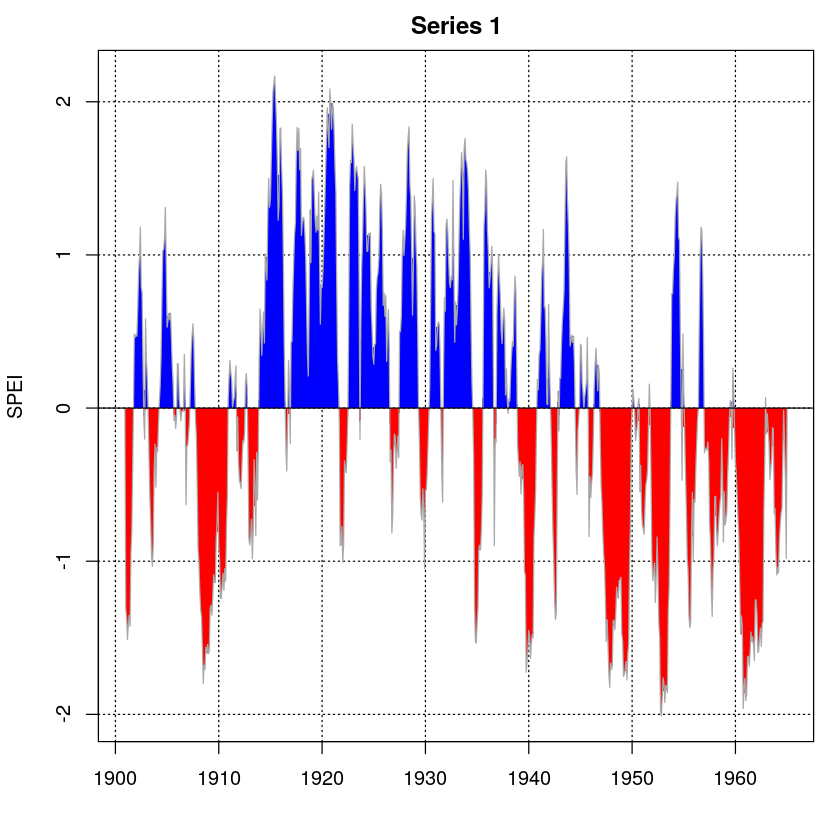

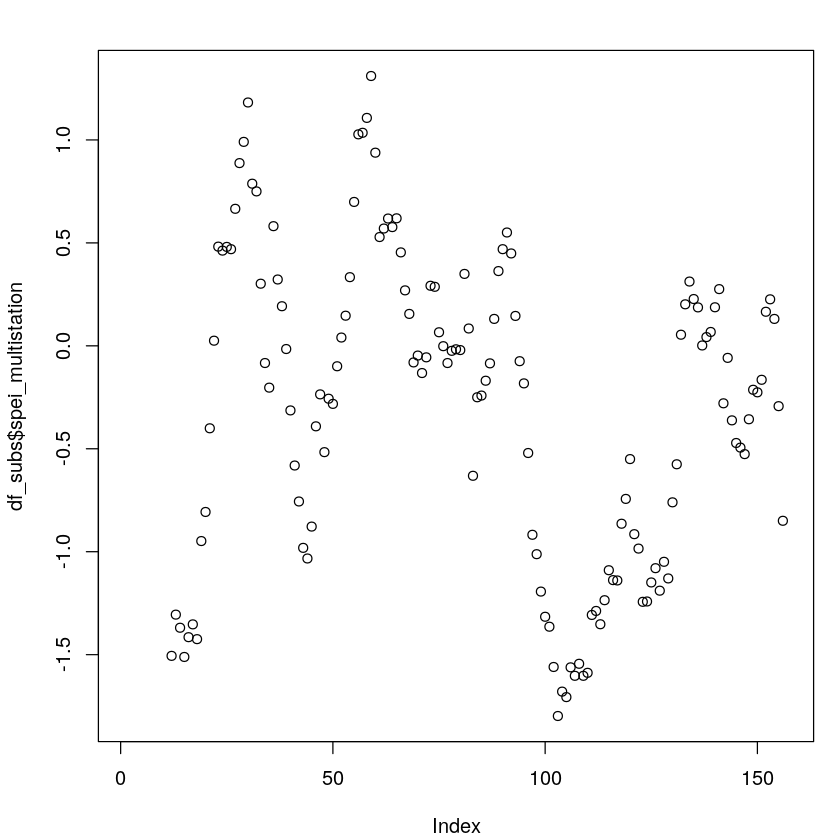

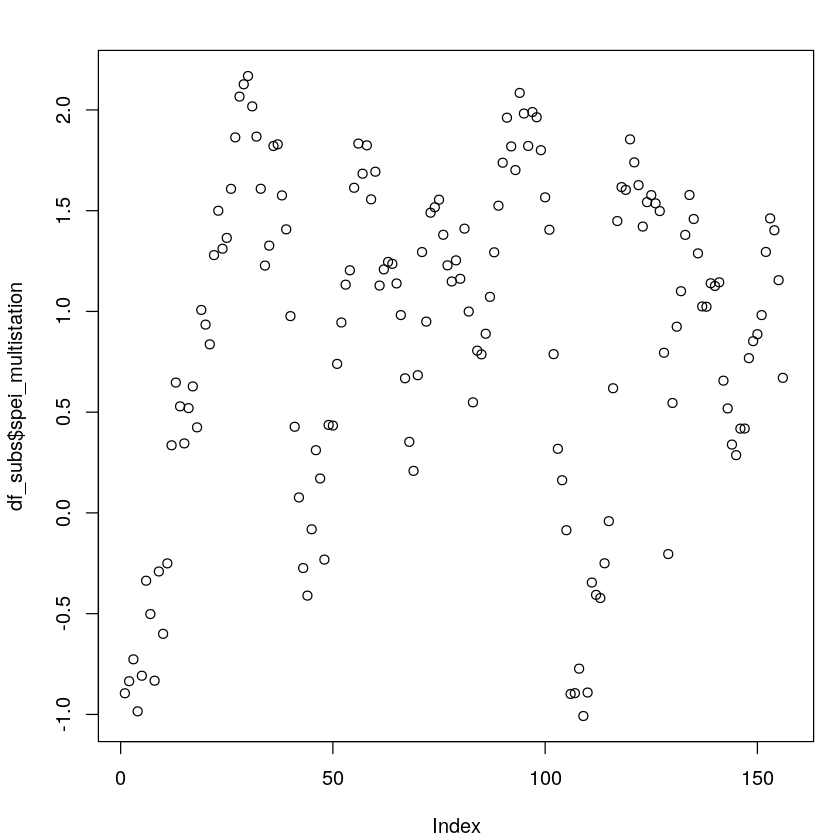

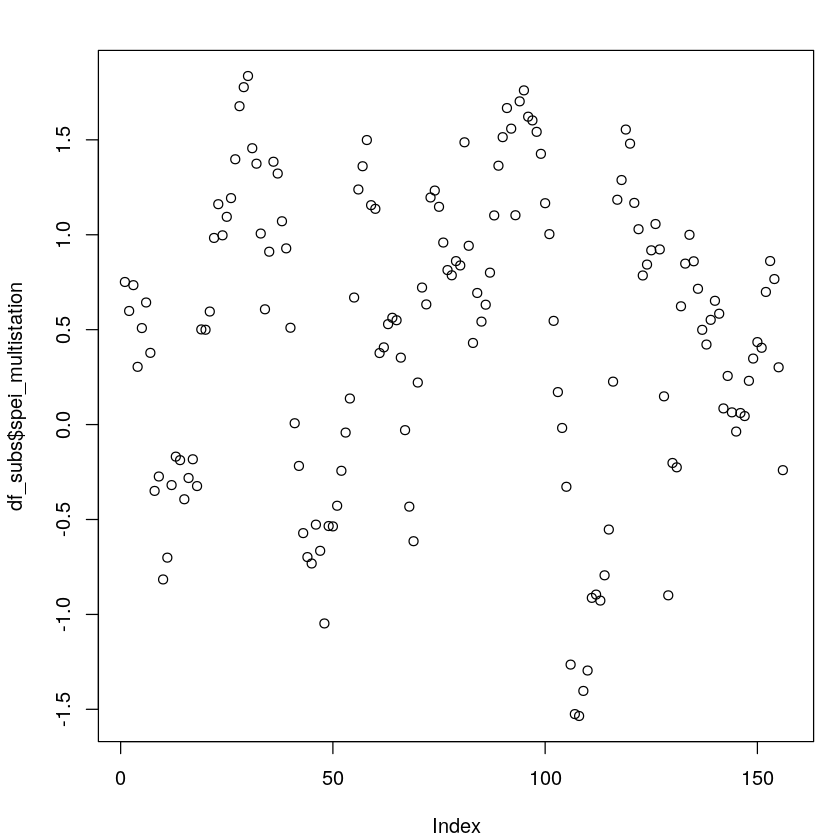

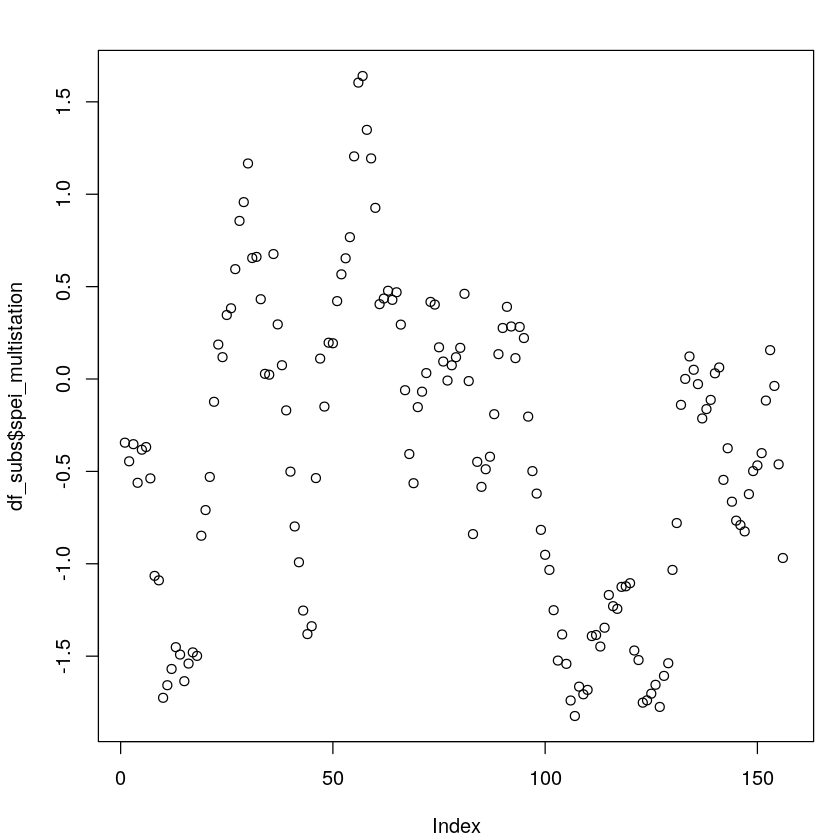

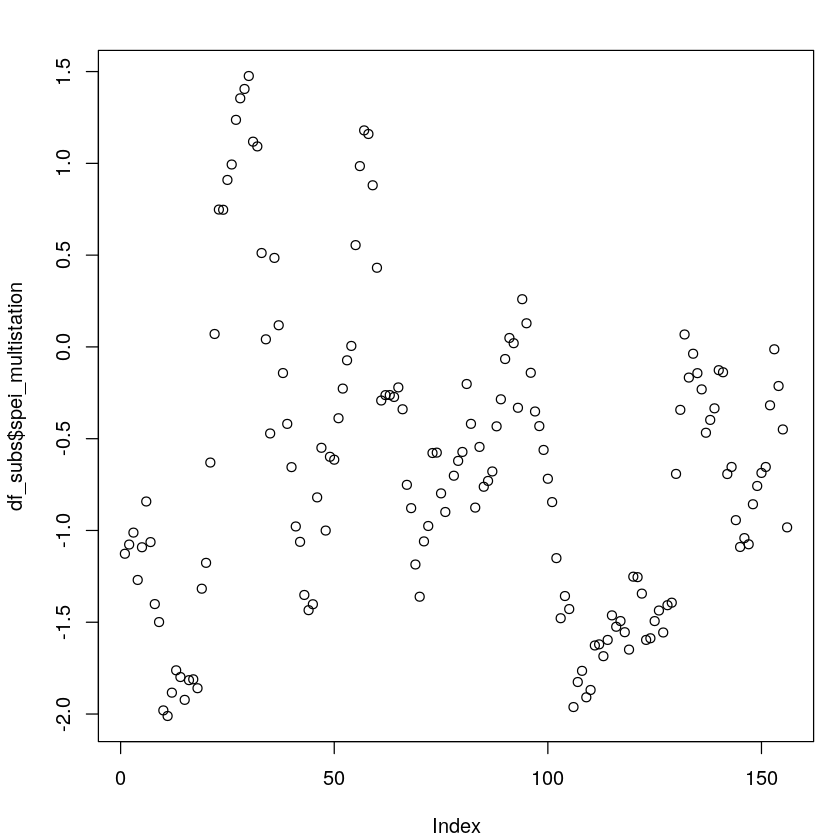

In [8]:
# Calculate climatic water differential then SPEI
int_months <- 12
cwdiff <- df_multista$Precip_ambient - df_multista$PET

spei2_i <- spei(ts(cwdiff, frequency=12, start=c(1900, 1)),
                       int_months, na.rm=TRUE)

plot(spei2_i)

# Make this an xts object that can be bound to df_subs_m
df_multista$spei_multistation <- as.vector(spei2_i$fitted)

tail(df_multista)

write.csv(df_multista, file = paste('./SPEI_out/', 'Sev_multistation_', int_months,'moSPEI', '.csv', sep=''),
          row.names = FALSE)

for (i in 1:5){
    # Subset to station
    df_subs <- df_multista[df_multista$Sta==station[i],]
    plot(df_subs$spei_multistation)
    }